In [275]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%pprint off
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'

Pretty printing has been turned OFF


In [276]:
def rearrange_col(dataframe, col_to_move, reference_col, right=True):
    col_list = dataframe.columns.values.tolist()
    col_list2 = [x for x in col_list if x != col_to_move]
    reference_idx = col_list2.index(reference_col)
    if right==True:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.append(col_to_move)
        return dataframe[col_list3]
    else:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.insert(-2, col_to_move)
        return  dataframe[col_list3]

In [277]:
fpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/results_catchreject_0813.csv'

In [278]:
#### PART1: CALCULATE SUBJECT-TO-GROUP CORRELATION PER HIT
res = pd.read_csv(fpath, converters={'response': eval, 'RT': eval, 'buttonpress': eval, 'catch_response': eval})
#res.sort_values(by=['stim_id', 'id'], inplace=True)
print('before catch-based rejection:', res.shape)
res.tail()

######################### check number of responses per lemma
# for i in set(res['stim_id']): 
#     df = res.loc[res['stim_id']==i]
#     print (i, df.iloc[1,].stim, df.shape[0])

########################## convert N/A to 0 
res['catch_response_upd'] = res['catch_response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])
res['response_upd'] = res['response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])

res = rearrange_col(res, 'catch_response_upd', 'catch_response')
res = rearrange_col(res, 'response_upd', 'response')
res

res.drop(columns=['catch_response', 'response'], inplace=True)
res.rename(columns={'response_upd': 'response', 'catch_response_upd':'catch_response'}, inplace=True)

######################### drop bad subjects
res = res.loc[res['badsubject']=='N', ]
res = res.reset_index(drop=True)
print ('after catch-based rejection:', res.shape)
res[1:3]

before catch-based rejection: (4335, 20)
after catch-based rejection: (3802, 20)


,id,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject
1,2,295,see,2,"[6, 3, 0, 1, 1, 2, 0, 4, 0, 1, 0, 3, 3, 0, 0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0, 6, 0, 6, 6]",4,N
2,3,214,flatten,3,"[3, 0, 0, 0, 5, 3, 1, 1, 3, 2, 0, 5, 0, 1, 4, ...",2021-05-25 16:26:58,2021-05-25 16:36:47,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0, 6, 0, 6, 6]",4,N


In [279]:
#################### create an average dict ###################### 
#del avg_df
stim_id_n = len(set(res['stim_id']))  ###i.e., 320

response_n = len(res.iloc[0]["response"])
print('# of questions:', response_n)
column = []
for i in range(1, response_n+1):
    column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

avg_dict = {}
for i in range(1, stim_id_n+1): #loop over 320 verbs 
    df = res.loc[res['stim_id']==i, ]
    df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)
    avg = list(df_responses.mean()) #mean rating for each attribute
    avg = [round(a,3) for a in avg]
    std = list(df_responses.std())
    std = [round(s,3) for s in std] #stdev of rating for each attribute
#     print (df.shape)
#     print (df_responses.shape)

    avg_dict[i] = {'stim': df.iloc[0]['stim'], 'subject_ids': df['subject_id'].values.tolist(), 
                  'NofResponse': df.shape[0], 'avg_ratings': avg, 'std_ratings':std} #avg_rating= mean for each attribute
avg_df = pd.DataFrame.from_dict(avg_dict, orient='index')
avg_df.head()

# of questions: 72


,stim,subject_ids,NofResponse,avg_ratings,std_ratings
1,live,"[206, 213, 223, 286, 266, 179, 5, 97, 123, 357...",12,"[2.25, 0.833, 0.167, 0.583, 0.333, 0.917, 0.58...","[2.05, 1.193, 0.389, 1.084, 0.651, 1.975, 0.99..."
2,speak,"[7, 435, 7, 19, 40, 374, 3, 531, 160, 341, 100...",14,"[0.857, 0.143, 0.071, 0.071, 0.429, 0.5, 1.071...","[1.351, 0.363, 0.267, 0.267, 0.852, 0.855, 1.3..."
3,listen,"[203, 122, 345, 105, 136, 684, 182, 114, 595, ...",12,"[1.833, 0.75, 1.083, 0.583, 0.833, 1.0, 1.083,...","[1.992, 1.865, 2.314, 1.165, 1.85, 1.859, 1.78..."
4,walk,"[6, 56, 423, 311, 523, 564, 258, 114, 1060, 23...",11,"[1.0, 0.455, 0.0, 0.091, 0.273, 0.364, 0.182, ...","[1.789, 1.036, 0.0, 0.302, 0.647, 0.809, 0.405..."
5,fly,"[269, 128, 369, 44, 10, 3, 201, 393, 235, 11, ...",13,"[2.769, 1.308, 1.385, 0.923, 1.308, 1.462, 2.5...","[2.351, 2.057, 2.063, 2.253, 2.175, 1.808, 1.8..."


In [280]:
df_responses

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72
0,2,2,3,0,0,1,1,1,1,1,0,1,1,0,1,2,1,0,0,0,2,3,1,1,1,1,0,0,1,1,1,1,1,1,1,3,2,3,2,2,2,1,2,2,3,3,3,4,3,3,4,3,4,3,4,1,4,1,4,3,3,4,4,2,1,4,5,1,3,3,3,2
1,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,1,1,1,0,0,0,6,0,0,0,1,4,0,0,0,1,1,6,5,3,2,1,1,1,6,0,6,0,5,0,5,2,1,5,5,3,0,6,5,3,2,0,5,3
2,1,0,1,0,0,4,0,3,3,3,1,3,1,2,1,0,0,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,0,0,0,2,3,5,3,5,2,4,3,0,5,0,4,0,4,0,3,1,1,2,1,3,0,4,2,2,0,0,5,4
3,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,3,0,0,1,0,3,3,2,6,5,1,5,3,4,0,3,0,6,0,5,3,3,4,2,1,0,2,6,1,5,2,3,1
4,3,0,0,0,1,4,0,2,1,1,5,2,1,1,1,0,0,0,0,0,3,5,1,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,0,0,2,2,3,1,6,4,3,4,1,0,1,0,6,0,5,0,3,4,2,4,3,1,0,5,5,2,4,6,6,4
5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,1,3,5,1,3,1,0,3,0,3,0,3,0,3,2,0,3,4,0,0,0,5,0,3,1,3,2
6,0,4,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,3,1,2,3,1,0,2,0,1,0,0,0,0,1,1,2,5,2,0,3,5,0,1,3,4,2
7,1,0,0,0,0,0,0,2,1,0,0,0,1,1,0,0,0,0,0,0,0,1,2,0,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,0,2,0,0,1,1,1,2,1,2,4,1,3,1,0,0,1,0,2,1,1,0,0,3,2,0,4,4,0,0,1,1,3
8,1,1,2,0,0,4,3,5,5,1,3,3,0,3,0,0,0,0,0,1,3,3,1,0,0,0,1,0,0,0,0,0,3,0,1,0,2,2,0,4,2,0,3,2,3,3,4,4,4,5,3,1,0,5,5,2,4,2,3,3,2,4,3,3,0,4,4,3,4,6,5,4
9,6,3,0,0,0,2,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,4,4,6,0,5,0,1,5,4,0,2,0,0,2,0,0,0,0,5,0,6,0,0,0,2,6,6,2,6,0,0,3,1,3,3,3,6,6,6,2,5,6,4,0,6,6,5,4,6,5,5


In [281]:
########calculate intersubject correlation and update res
from scipy.stats.stats import pearsonr

#update res_dict so as to include "subject-to-group" correlation
res_dict = res.to_dict(orient='index')

for k, v in res_dict.items():
    response = v['response']
    check = v['stim'] == avg_dict[v['stim_id']]['stim']
    if check == False:
        print ('something wrong!')
    group_avg = avg_dict[v['stim_id']]['avg_ratings']
    v['corr'] = round(pearsonr(response, group_avg)[0],3) ###correlation b/w this vector and group average vector for word X.
    v['corr_fisher'] = np.arctanh(v['corr'])
#pearsonr(response, group_response)[0]

### convert res_dict to df
res_upd = pd.DataFrame.from_dict(res_dict, orient='index') #res updated

### find HITs where the response is constant (i.e., subject hitting the same button all the time)
res_upd[res_upd['corr'].isna()]
print('# of rows before dropping:', res_upd.shape[0])
res_upd = res_upd.dropna(subset=['corr'])
print('# of rows after dropping:', res_upd.shape[0])

### write res_upd to csv 
#res_upd.to_csv(savepath + '/HITs_with_correlations_0813.csv', index=False) ### HITs after dropping catch-failed HITs

# of rows before dropping: 3802
# of rows after dropping: 3801


In [200]:
# df1 = pd.read_csv(savepath + '/HITs_with_correlations_0813.csv')
# df2 = pd.read_csv(savepath + '/HITs_clean_with_correlations_0813.csv')
# print (df1.equals(df2))

True


# of responses below r= 0.4 : 337
before: (3801, 22)
after: (3464, 22)


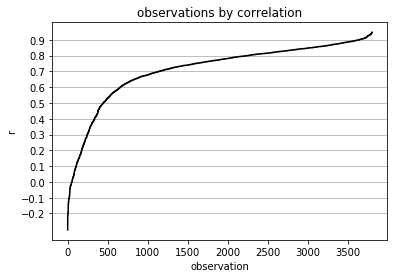

In [282]:
###### plot histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# res_upd.hist(column='corr', cumulative=True, bins=150, ax=ax)
# fig.savefig(savepath+'/subj_to_group_corr_hist_0813.png') #based on all catch-pass trials

###### plot cumulative distribution of corr ("sort observation by corr")
corr = sorted(res_upd['corr'].tolist())
#plt.step(x=corr, y=np.arange(len(corr)))
plt.step(x=np.arange(len(corr)), y=corr, c="black")
plt.title("observations by correlation")
plt.xlabel("observation")
plt.ylabel("r")
plt.yticks(np.arange(-0.2, 1, 0.1))
plt.grid(axis="y")
plt.savefig(savepath+'/observations_by_correlation_0813.png')


#### drop responses where r < threshold
thre = 0.4
below_thre = res_upd[res_upd['corr']< thre].shape
print('# of responses below r=', thre, ':', below_thre[0])
dropind = res_upd[res_upd['corr'] < thre].index.tolist()
#res_upd.drop([0,1])
print('before:', res_upd.shape)
res_upd.drop(dropind, inplace=True)
print('after:', res_upd.shape)

In [283]:
print ("**** From here we deal with 'clean' data, i.e., wrt catch trials & sub-to-group correlation*******")

**** From here we deal with 'clean' data, i.e., wrt catch trials & sub-to-group correlation*******


In [284]:
###### Part 2: find out bad words
quesf = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/stimuli/questions.txt'
ques = pd.read_csv(quesf, delimiter='\t', header=None).iloc[:, :2].rename(columns={0:'fname', 1:'question'})
q_dict = ques.to_dict(orient='index')

#find only "verb" features
new_q = ques.iloc[67:,]
caused = ques.loc[ques['fname']=='Caused',]

verb_ques = pd.concat([caused, new_q])

In [285]:
verb_ques

,fname,question
46,Caused,To what extent does this verb describe an even...
67,Boundedness,Some verbs refer to an activity that could con...
68,Actor,To what extent does this verb describe somethi...
69,Done to Something Else,To what extent does this verb describe an acti...
70,State of Being,To what extent does this verb describe a <i>ch...
71,Require Energy Input,To what extent is physical or mental energy re...


In [286]:
## export data (for each verb, one response for each feature)

res_clean = res_upd[["stim_id", "stim", "subject_id", "response", "correctN", "corr_fisher"]]

new_column= list(range(response_n)) #[0,1,2,...71]
res_clean[new_column] = pd.DataFrame(res_clean.response.tolist(), index= res_clean.index)

d = dict()
#for i in [46,67,68,69,70,71]:
for i in range(0,response_n):
    d[i] = q_dict[i]['fname']

res_clean = res_clean.rename(columns=d)
res_clean.head()

##export res_sub
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
#res_clean.to_csv(savepath+'/clean_HITs_72features_0813.csv', index=False) ##HITs that only include crucial info

In [287]:
#### create df of standard deviation and mean for each word (i.e., word x features)
res_clean = pd.read_csv(savepath+'/clean_HITs_72features_0813.csv')
stim_ids = sorted(res_clean['stim_id'].unique())

#create new empty df 
orig_cols = res_clean.columns.values.tolist()
rmlist = ['subject_id', 'response', 'correctN', 'corr_fisher']
new_cols = [o for o in orig_cols if o not in rmlist]

df_sd = pd.DataFrame(columns=new_cols)

#1. iterate over 320 verbs and append new row (SD) to df
for i in stim_ids:
    df_sel = res_clean.loc[res_clean['stim_id']==i, ]
    stim_id = df_sel['stim_id'].unique()[0]
    stim = df_sel['stim'].unique()[0]

    df_features = df_sel.drop(columns=['stim_id', 'stim', 'subject_id', 'response', 'correctN', 'corr_fisher'])
    new_row_sd = round(df_features.std(),2).to_frame().T #row of standard deviations
    new_row_sd['mean_72feat_SD'] = round(new_row_sd.mean(numeric_only=True, axis=1),3).values[0]
    sixfeatures = ["Caused", "Boundedness", "Actor", "Done to Something Else", "State of Being", "Require Energy Input"]
    new_row_sd['mean_6feat_SD'] = round(new_row_sd.loc[:, sixfeatures].mean(axis=1),3).values[0]
    new_row_sd['stim_id'] = stim_id
    new_row_sd['stim'] = stim
    new_row_sd['responseN'] = int(df_sel.shape[0])
    df_sd = df_sd.append(new_row_sd, sort=False)
    del new_row_sd

#df_sd.head()

# #2. iterate over 320 verbs and append new row (mean) to df
df_mean = pd.DataFrame(columns=new_cols)

for k in stim_ids:
    df_sel = res_clean.loc[res_clean['stim_id']==k, ]
    stim_id = df_sel['stim_id'].unique()[0]
    stim = df_sel['stim'].unique()[0]

    df_features = df_sel.drop(columns=['stim_id', 'stim', 'subject_id', 'response', 'correctN', 'corr_fisher'])
    new_row_mean = round(df_features.mean(),2).to_frame().T
    new_row_mean['stim_id'] = stim_id
    new_row_mean['stim'] = stim
    df_mean = df_mean.append(new_row_mean, sort=False)
    del new_row_mean
    
col_mean = [n+'-m' if new_cols.index(n)>1 else n for n in new_cols] # m meaning 'mean'
df_mean.columns = col_mean
df_mean = df_mean.drop(columns = 'stim')
#df_mean.head()

#3. add mean SD for each row
if df_mean.shape[0] != df_sd.shape[0]:
    print ('mean df and sd df have different lengths!')

df_fin = pd.merge(df_sd, df_mean, on = 'stim_id') # df that has both SD and MEAN (fin meaning 'final')

# clean up
df_fin['responseN'] = df_fin['responseN'].astype(int)
df_fin = rearrange_col(df_fin, 'responseN', 'stim')
df_fin = rearrange_col(df_fin, 'mean_72feat_SD', 'responseN')
df_fin = rearrange_col(df_fin, 'mean_6feat_SD', 'mean_72feat_SD')

#df_fin.head()


df_fin.to_csv(savepath + '/clean_320verbs_SD_Mean.csv', index=False)

In [290]:
#########PART3: integrate SD dataframe with verblist
sdpath = savepath + '/clean_320verbs_SD_Mean.csv'
spreadsheetpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/Verblists/List320.csv'

df_sd = pd.read_csv(sdpath, index_col=0)
df_ss = pd.read_csv(spreadsheetpath) #ss meaning spreadsheet
df_ss = df_ss.loc[df_ss['in']==1]
check = df_sd.shape[0] == df_ss.shape[0]
if check !=1:
    print ('spreadsheet and sd table have diff lengths!')

### add sd to the verblist
#df_sd_upd = pd.merge(left=df_sd, right=df_list, left_on= 'stim', right_on='Lemma')
df_ss2 = pd.merge(left=df_ss, right=df_sd, left_on= 'Lemma', right_on='stim')


# #### clean up merged df
df_ss2.drop(columns=['badverb', 'GrandIndex', 'in', 'whyexcluded', 'stim', 'abs_marginality', 
                     'rel_marginality', 'SynClassLitrt', 'SynClassSK', 'good'], inplace=True)

#### add mean (subject-to-group) correlation to df_ss2 ##### (optional)
#thre = 0.4
corr_raw = pd.read_csv(savepath + '/HITs_with_correlations_0813.csv')
corr_thre = corr_raw[corr_raw['corr']>=thre] #only keep HITs above threshold (of raw corr)
#corr_thre.shape

corr_thre = corr_thre[["stim_id", "stim", "subject_id", "corr", "corr_fisher"]]
corr_thre['corr_fisher'] = corr_thre['corr_fisher'].round(decimals=3)
corr_thre['corr'] = corr_thre['corr'].round(decimals=3)   

from statistics import mean
corr_dict = {}
for i in range(1,321):
    df_sel = corr_thre.loc[corr_thre['stim_id']==i]
    stim_id = df_sel.iloc[0]['stim_id']
    stim = df_sel.iloc[0]['stim']
    corr_list = df_sel['corr_fisher'].values.tolist()
    corr_list.sort(reverse=True)
    corr_list = [round(c,3) for c in corr_list]
    mean_corr = round(df_sel['corr_fisher'].mean(), 3)
    
    d_add = {'stim_id': stim_id, 'stim': stim, 'corr_list':corr_list, 'mean_fcorr':mean_corr}
    corr_dict[i] = d_add

corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')
corr_df[corr_df['stim']=='urinate']

df_ss_out = pd.merge(left=df_ss2, right=corr_df, left_on='Lemma', right_on='stim')
df_ss_out = df_ss_out.drop(columns=['stim'])
df_ss_out = rearrange_col(df_ss_out, 'responseN', 'freq_matched')
# df_sd_out = rearrange_col(df_sd_out, 'corr_list', 'mean_fcorr')
df_ss_out = rearrange_col(df_ss_out, 'mean_72feat_SD', 'responseN')
df_ss_out = rearrange_col(df_ss_out, 'mean_6feat_SD', 'mean_72feat_SD')
df_ss_out = rearrange_col(df_ss_out, 'mean_fcorr', 'mean_6feat_SD')
df_ss_out = rearrange_col(df_ss_out, 'stim_id', 'Lemma')
df_ss_out = rearrange_col(df_ss_out, 'corr_list', 'mean_fcorr', right=False)
######
#df_ss_out.head()

### write to csv
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
df_ss_out.to_csv(savepath + '/list320_with_ratingsummary_0813.csv', index=False)

== SD for 6 feature =======
10 percent: 1.3615000000000002
50 percent: 1.6775
90 percent: 1.969
== SD for all features =====
10 percent: 0.986
50 percent: 1.216
90 percent: 1.4275


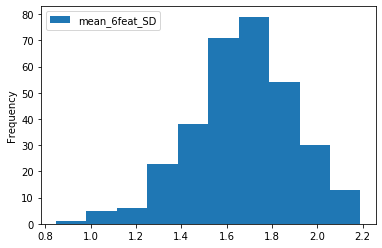

In [291]:
# df_ss_out.plot(y=["mean_fcorr"], kind="hist")
# df_ss_out.plot(y=["mean_72feat_SD"], kind="hist")
df_ss_out.plot(y=["mean_6feat_SD"], kind="hist")
# df_ss_out.plot(x="mean_72feat_SD", y="mean_fcorr", kind="scatter")

# find percentiles
print ('== SD for 6 feature =======')
for x in [10, 50, 90]:
    percentile = np.percentile(df_ss_out['mean_6feat_SD'], x, interpolation='midpoint')
    print (x,'percent:', percentile)
    
print ('== SD for all features =====')
for y in [10, 50, 90]:
    percentile = np.percentile(df_ss_out['mean_72feat_SD'], y, interpolation='midpoint')
    print (y,'percent:', percentile)

== SD for 6 feature =======
10 percent: 1.36
50 percent: 1.68
90 percent: 1.97
== SD for all features =====
10 percent: 1.13
50 percent: 1.35
90 percent: 1.57


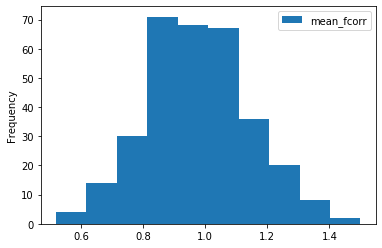

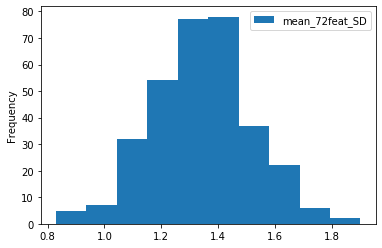

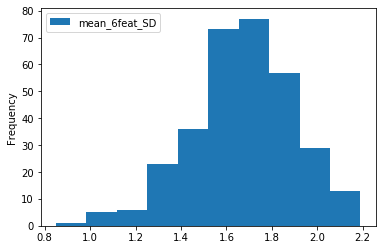

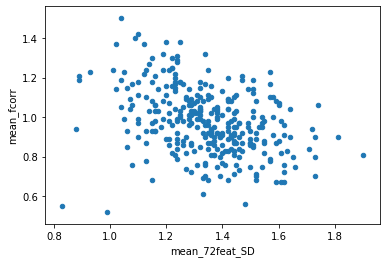

In [80]:
## plotting (outdated)
df_ss_out.plot(y=["mean_fcorr"], kind="hist")
df_ss_out.plot(y=["mean_72feat_SD"], kind="hist")
df_ss_out.plot(y=["mean_6feat_SD"], kind="hist")
df_ss_out.plot(x="mean_72feat_SD", y="mean_fcorr", kind="scatter")

## find percentiles
print ('== SD for 6 feature =======')
for x in [10, 50, 90]:
    percentile = np.percentile(df_ss_out['mean_6feat_SD'], x, interpolation='midpoint')
    print (x,'percent:', percentile)
    
print ('== SD for all features =====')
for y in [10, 50, 90]:
    percentile = np.percentile(df_ss_out['mean_72feat_SD'], y, interpolation='midpoint')
    print (y,'percent:', percentile)

In [ ]:
######### PART 4: WITH UPDATED VERBLIST, NARROW DOWN TO 200 VERBS

In [ ]:
##### explore rating

## 1) correlation b/w 
# meanSD & concretness 
# meanSD & AgeofAqn
# meanSD & percentage of Dominant use as verb
# meanSD & 
# meanSD & syncat
# meanSD & aspcat 

# years of education & deviation from group mean
# time spent & deviation from group mean

In [292]:
# quantitative differences between a priori categories
syn_cat = ['unerg', 'unacc', 'trans']
asp_cat = ['activity', 'state', 'achvm']
# For each comparison, an unpaired t-test was conducted for 72 attributes ()
# x = ['vision' rating for unergatives], y = ['vision' rating for unaccusative]

In [ ]:
# k means cluster analysis
### k-means cluster analysis of the entire 320 word set, with k =? 

In [ ]:
#np.arctanh(0.767)

# from scipy.stats import zprob
# def z_transform(r, n):
#     z = np.log((1 + r) / (1 - r)) * (np.sqrt(n - 3) / 2)
#     p = zprob(-z)
#     return p